In [50]:
from datetime import datetime, timedelta
import numpy as np

import data
import reference
import const
import events
import analysis

In [46]:
a = reference.referenceMonstein(2022,1,12)
b = a[6]
b

['II', 04:24:00, 04:56:00, '1.0000']

In [47]:
c = b.time_start
d = b.time_end
year = b.time_start.year
month = b.time_start.month
day = b.time_start.day

dp = data.createFromTime(year, month, day, str(c), b.stations[0], const.spectral_range)

create spectrum size of [start - stop] with 15min * n


In [48]:
i = 1
while dp.spectrum_data.end < d:
    new_time = c + timedelta(minutes=15*i)
    dp += data.createFromTime(new_time.year, new_time.month, new_time.day, str(events.time(new_time)), b.stations[0], const.spectral_range)
    i += 1

cut array into exact size

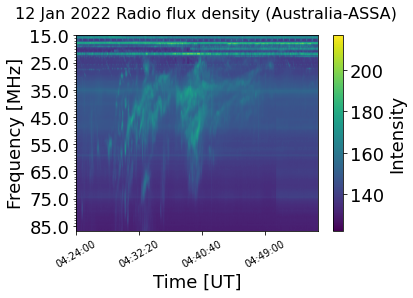

In [49]:
delta = 0
del_start = int((b.time_start - dp.spectrum_data.start - timedelta(seconds=(delta))).total_seconds()*const.DATA_POINTS_PER_SECOND)
del_end = int((b.time_end - dp.spectrum_data.start + timedelta(seconds=(delta))).total_seconds()*const.DATA_POINTS_PER_SECOND)
dp.spectrum_data.data = dp.spectrum_data.data[:,del_start:del_end]
dp.spectrum_data.start = b.time_start
dp.plot()

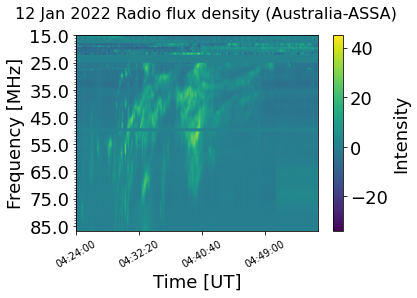

In [51]:
dp.subtract_background()
mask = analysis.maskBadFrequencies(dp)
dp.spectrum_data.data[mask] = np.mean(dp.spectrum_data.data)
dp.plot()